In [392]:
import pandas as pd
import numpy as np
import pandas_profiling
# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [394]:
df3 = pd.read_csv('datasets/cardio_train.csv', delimiter=';')
print(df3.shape)
df3.head()

(70000, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Getting information

In [395]:
df3.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### Checking for null values

In [396]:
df3.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [397]:
df3.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#### Checking for extreme values

In [398]:
df3 = df3.drop(df3['ap_hi'].idxmax())

In [399]:
df3['ap_hi'].max()

14020

<AxesSubplot:>

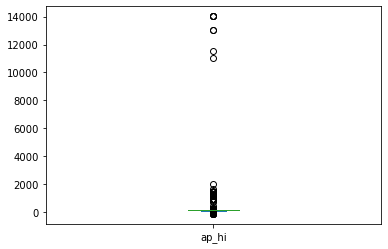

In [400]:
df3['ap_hi'].plot.box()


#### Ap hi has very extreme values which should not be possible and a large amount of them so dont feel like its responsible to use this data

In [401]:
df3 = df3.drop(df3['ap_lo'].idxmax())

In [402]:
df3['ap_lo'].max()

10000

<AxesSubplot:>

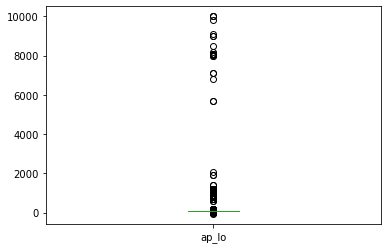

In [403]:
df3['ap_lo'].plot.box()


#### Same with ap_lo, so i decide to remove them

In [378]:
df3=df3.loc[:, ~df3.columns.isin(['ap_hi', 'ap_lo'])]
df3

,id,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,1,1,0,0,1,0
1,1,20228,1,156,85.0,3,1,0,0,1,1
2,2,18857,1,165,64.0,3,1,0,0,0,1
3,3,17623,2,169,82.0,1,1,0,0,1,1
4,4,17474,1,156,56.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,1,2,0,0,0,1


#### Changed the age from days to years

In [379]:
df3['age']=df3['age']/365

#### Changed the age into a int

In [380]:
df3['age']=df3['age'].astype(int)


#### thought it would be nice to now use the data I have to get new data
#### The BMI

#### I change height to be in meters

In [381]:
df3['height']=df3['height']/100

#### Run the formular

In [382]:
height2=(df3['height'])*(df3['height']);
df3['bmi']=(df3['weight']/height2)
df3['bmi']=df3['bmi'].astype(int)

In [383]:
df3

,id,age,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,1.68,62.0,1,1,0,0,1,0,21
1,1,55,1,1.56,85.0,3,1,0,0,1,1,34
2,2,51,1,1.65,64.0,3,1,0,0,0,1,23
3,3,48,2,1.69,82.0,1,1,0,0,1,1,28
4,4,47,1,1.56,56.0,1,1,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52,2,1.68,76.0,1,1,1,0,1,0,26
69996,99995,61,1,1.58,126.0,2,2,0,0,1,1,50
69997,99996,52,2,1.83,105.0,3,1,0,1,0,1,31
69998,99998,61,1,1.63,72.0,1,2,0,0,0,1,27


In [384]:
pandas_profiling.ProfileReport(df3).to_file("cardio.html")


Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### In this picture under, you can see that chol, bmi, weight and age all correlate with cardiovascular disease

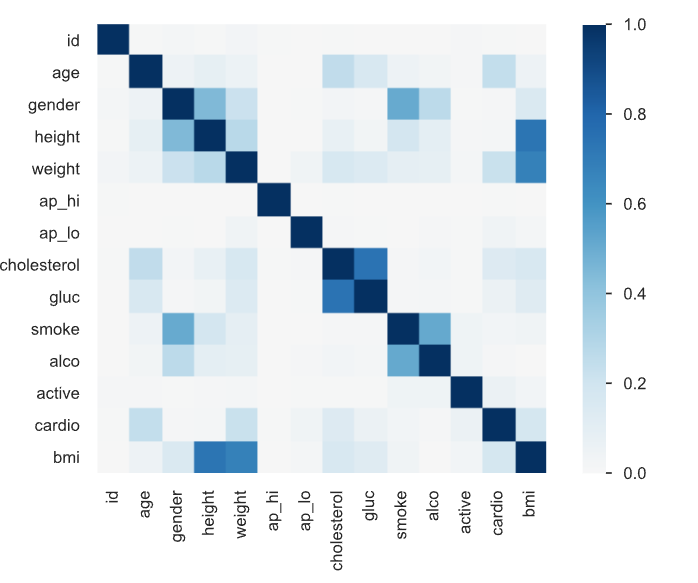
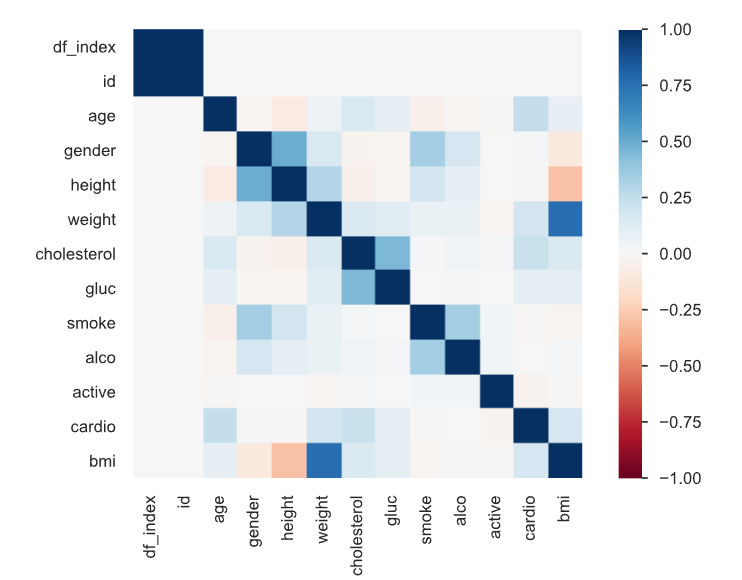

In [415]:
corr = df3.corr(method="pearson")
cmap = sns.cm.vlag_r
corr.style.background_gradient(cmap=cmap)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003451,0.003510,-0.003037,-0.001841,0.003175,-0.002942,0.006112,0.002471,-0.003696,0.001212,0.003761,0.003789
age,0.003451,1.000000,-0.022804,-0.081499,0.053637,0.023857,0.016796,0.154433,0.098709,-0.047631,-0.029721,-0.009962,0.238158
gender,0.003510,-0.022804,1.000000,0.499040,0.155431,0.007701,0.016252,-0.035833,-0.020500,0.338132,0.170963,0.005850,0.008131
height,-0.003037,-0.081499,0.499040,1.000000,0.290997,0.005059,0.006753,-0.050226,-0.018595,0.187991,0.094419,-0.006550,-0.010822
weight,-0.001841,0.053637,0.155431,0.290997,1.000000,0.033796,0.042983,0.141787,0.106872,0.067791,0.067121,-0.016891,0.181642
ap_hi,0.003175,0.023857,0.007701,0.005059,0.033796,1.000000,0.017620,0.026690,0.013495,-0.000501,0.001913,0.003200,0.057551
ap_lo,-0.002942,0.016796,0.016252,0.006753,0.042983,0.017620,1.000000,0.025071,0.011408,0.005578,0.011066,0.004478,0.066503
cholesterol,0.006112,0.154433,-0.035833,-0.050226,0.141787,0.026690,0.025071,1.000000,0.451574,0.010350,0.035757,0.009900,0.221167
gluc,0.002471,0.098709,-0.020500,-0.018595,0.106872,0.013495,0.011408,0.451574,1.000000,-0.004760,0.011243,-0.006778,0.089320
smoke,-0.003696,-0.047631,0.338132,0.187991,0.067791,-0.000501,0.005578,0.010350,-0.004760,1.000000,0.340092,0.025852,-0.015477


#### also found it interesting that chol and gluc had such a high correlation

In [385]:
stats=df3

#### Setting up data to be more graphical ready

In [386]:
ranges = [10,20,30,40,50,60,70,80,90,100]
stats['bmi']=pd.cut(stats.bmi, ranges)

In [387]:
ranges = [0,10,20,30,40,50,60,70,80,90,100]
stats['age']=pd.cut(df3.age, ranges)

<AxesSubplot:xlabel='gender'>

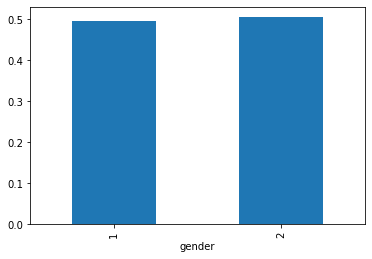

In [388]:
stats.groupby('gender')['cardio'].mean().plot(kind='bar')

<AxesSubplot:xlabel='age'>

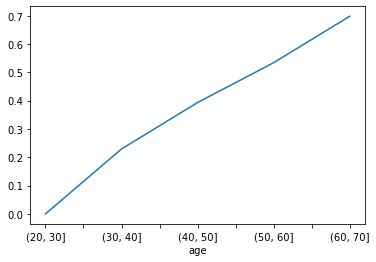

In [389]:
stats.groupby('age')['cardio'].mean().plot(kind='line')

<AxesSubplot:xlabel='cholesterol'>

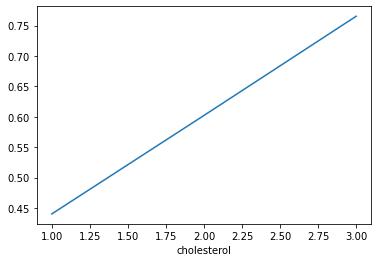

In [413]:
stats.groupby('cholesterol')['cardio'].mean().plot(kind='line')

<AxesSubplot:ylabel='cardio'>

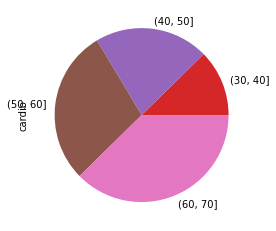

In [390]:
stats.groupby('age')['cardio'].mean().plot(kind='pie')

<AxesSubplot:xlabel='bmi'>

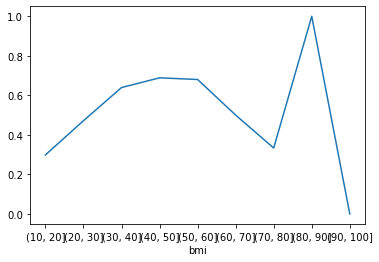

In [391]:
stats.groupby('bmi')['cardio'].mean().plot(kind='line')